# D(St)reams of Anomolies
## General Information
Author: Patrick McNamee
Date: 11/3/2019
## Description
Gathering AWS data from [Numenta Anomaly Benchmark](https://www.kaggle.com/boltzmannbrain/nab) to test some algorithms for anomaly detection.
## Data Engineering
First thing is to load the data in a pandas data frame

In [29]:
import pandas as pd

#Reading in all the ec2 cpu utilization files
cpu1 = pd.read_csv(r'./data/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv')
cpu2 = pd.read_csv(r'./data/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_24ae8d.csv')
cpu3 = pd.read_csv(r'./data/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_53ea38.csv')
cpu4 = pd.read_csv(r'./data/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_77c1ca.csv')
cpu5 = pd.read_csv(r'./data/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_825cc2.csv')
cpu6 = pd.read_csv(r'./data/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_ac20cd.csv')
cpu7 = pd.read_csv(r'./data/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_c6585a.csv')
cpu8 = pd.read_csv(r'./data/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_fe7f93.csv')

#convert index
for cpu in [cpu2, cpu3, cpu4, cpu5, cpu6, cpu7, cpu8]:
    newindex = cpu1.index.union(cpu.index)
    cpu = cpu1.reindex(newindex)
for cpu in [cpu2, cpu3, cpu4, cpu5, cpu6, cpu7, cpu8]:
    cpu.reindex(cpu1.index)
for i, cpu in enumerate([cpu1, cpu2, cpu3, cpu4, cpu5, cpu6, cpu7, cpu8],
                       start=1):
    cpu = cpu.set_index('timestamp')
    cpu.rename(columns={'value': ('cpu' + str(i))}, inplace=True)
    
df = pd.concat([cpu1, cpu2, cpu3, cpu4, cpu5, cpu6, cpu7, cpu8],
              axis=1)

df.head()

,timestamp,value,timestamp,value,timestamp,value,timestamp,value,timestamp,value,timestamp,value,timestamp,value,timestamp,value
0,2014-02-14 14:27:00,51.846,2014-02-14 14:30:00,0.132,2014-02-14 14:30:00,1.732,2014-04-02 14:25:00,0.068,2014-04-10 00:04:00,91.958,2014-04-02 14:29:00,42.652,2014-04-02 14:29:00,0.066,2014-02-14 14:27:00,2.296
1,2014-02-14 14:32:00,44.508,2014-02-14 14:35:00,0.134,2014-02-14 14:35:00,1.732,2014-04-02 14:30:00,0.102,2014-04-10 00:09:00,94.798,2014-04-02 14:34:00,41.362,2014-04-02 14:34:00,0.066,2014-02-14 14:32:00,2.144
2,2014-02-14 14:37:00,41.244,2014-02-14 14:40:00,0.134,2014-02-14 14:40:00,1.960,2014-04-02 14:35:00,0.100,2014-04-10 00:14:00,92.208,2014-04-02 14:39:00,43.408,2014-04-02 14:39:00,0.068,2014-02-14 14:37:00,2.274
3,2014-02-14 14:42:00,48.568,2014-02-14 14:45:00,0.134,2014-02-14 14:45:00,1.732,2014-04-02 14:40:00,0.098,2014-04-10 00:19:00,93.722,2014-04-02 14:44:00,40.262,2014-04-02 14:44:00,0.134,2014-02-14 14:42:00,2.066
4,2014-02-14 14:47:00,46.714,2014-02-14 14:50:00,0.134,2014-02-14 14:50:00,1.706,2014-04-02 14:45:00,0.102,2014-04-10 00:24:00,93.042,2014-04-02 14:49:00,40.328,2014-04-02 14:49:00,0.066,2014-02-14 14:47:00,2.350


TypeError: ('2014-02-14 14:27:00', '2014-02-14 14:30:00', '2014-02-14 14:30:00', '2014-04-02 14:25:00', '2014-04-10 00:04:00', '2014-04-02 14:29:00', '2014-04-02 14:29:00', '2014-02-14 14:27:00') is not a string

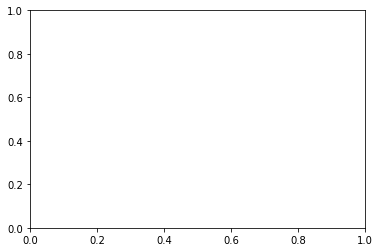

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df['value'],'b.')
plt.show()

In [6]:
df.tail()

,timestamp,value
4027,2014-02-28 14:02:00,38.474
4028,2014-02-28 14:07:00,40.352
4029,2014-02-28 14:12:00,37.912
4030,2014-02-28 14:17:00,38.458
4031,2014-02-28 14:22:00,37.718
